In [721]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

def gradientDescent(X, y, y_pred, n_samples, lambda_param, weights):
    gradient = (1 / n_samples) * (X.T @ (y_pred - y)) + (lambda_param / n_samples) * weights
    gradient[0] -= (lambda_param / n_samples) * weights[0]  # Don't regularize the bias term
    return gradient

def normalEquation(X, y, lambda_param):
    # Identity matrix
    identity_metrix = lambda_param * np.eye(X.shape[1])
    identity_metrix[0, 0] = 0  # Bias term should not be regularized

    # Normal equation for ridge regression
    weights = np.dot(np.linalg.inv(np.dot(X.T, X) + identity_metrix), np.dot(X.T, y))
    return weights

class RidgeRegression:
    def __init__(self, lambda_param, weights = None):
        self.lambda_param = lambda_param
        self.weights = weights
        self.weights_history = []
        self.costs_history = []

    def training(self, X, y, mode, lr = 0.1, n_iters = 100):
        if (mode == "normalEq"):
            self.weights = normalEquation(X, y, self.lambda_param)
        elif (mode == "gradientDes"):
            n_samples, n_features = X.shape
            self.weights = np.zeros(n_features)
            for _ in range(n_iters):
                self.weights_history.append(self.weights[1])
                self.costs_history.append(self.costFunction(X, y))
                y_pred = self.predict(X)
                weights_gradient = gradientDescent(X, y, y_pred, n_samples, self.lambda_param, self.weights)
                self.weights -= lr * weights_gradient
        else:
            raise Exception("Sorry, we don't have that type of optimization.")   
        
    def standardization(self, X):       # X_std = X - mean of X / standard deviation of X
        mean_x = np.array([np.mean(X)])
        std_x = np.array([np.std(X)])
        X_std = (X - mean_x) / std_x
        return X_std
    
    def test(self):
        print(self.weights.shape)
    
    def get_Weights_History(self):
        return self.weights_history
    
    def get_Costs_History(self):
        return self.costs_history
    
    def predict(self, X):
        return np.dot(X, self.weights)

    def costFunction(self, X, y):
        y_pred = self.predict(X)
        mse = np.sum((y - y_pred) ** 2)
        regularization = self.lambda_param * np.sum(self.weights[1:] ** 2)
        return mse + regularization

In [722]:
data = pd.read_csv('HeightWeight.csv')
data

,Height,Weight
0,187.571423,109.720985
1,174.706036,73.622732
2,188.239668,96.497550
3,182.196685,99.809504
4,177.499762,93.598619
...,...,...
9995,168.078537,62.041159
9996,170.350573,77.504315
9997,162.224700,58.275377
9998,175.346978,74.322166


Loss: 2.8220316434820407e-09


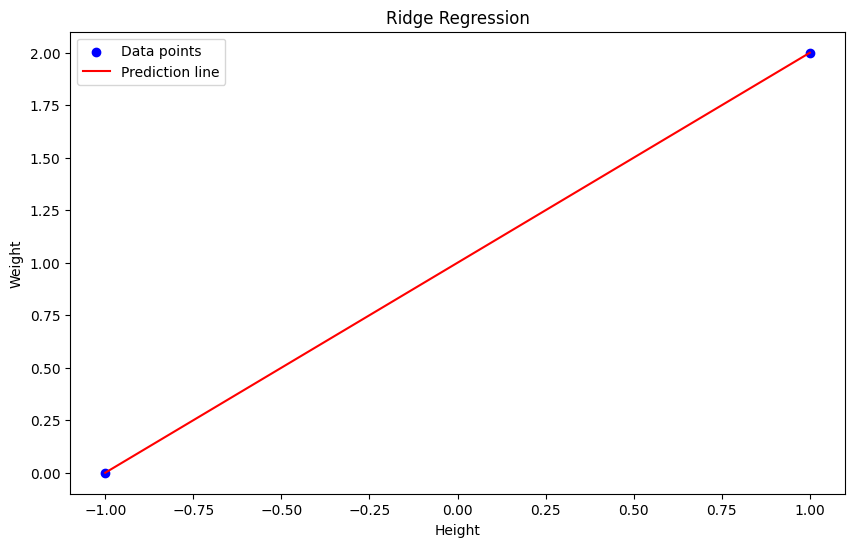

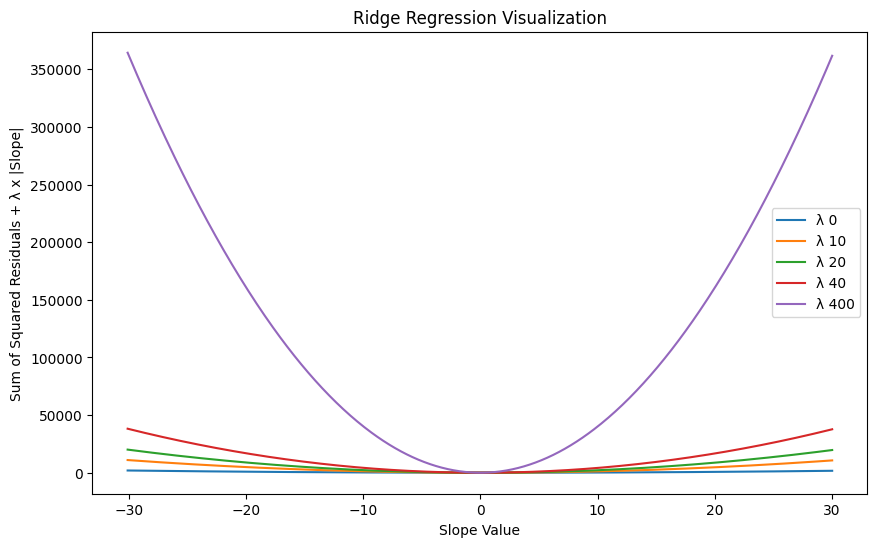

In [723]:
# Example usage:
if __name__ == "__main__":
    df = pd.read_csv('HeightWeight.csv')
    first_5_rows = df.head(100)

    # Sample data
    # X = first_5_rows["Height"].values
    # y = first_5_rows["Weight"].values
    
    X = np.array([[0], [2]])
    y = np.array([0, 2])
    
    # Create and train the model
    model = RidgeRegression(lambda_param=0)
    
    X = model.standardization(X)
    
    # Add bias term to X
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    
    model.training(X_b, y, "gradientDes")
    
    # Make predictions
    predictions = model.predict(X_b)
    
    # Calculate and print the loss
    error = model.costFunction(X_b, y)
    print("Loss:", error)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    
    # Plot original data points
    plt.scatter(X, y, color='blue', label='Data points')
    
    plt.plot(X, predictions, color='red', label='Prediction line')
    
    # Labels and title
    plt.xlabel('Height')
    plt.ylabel('Weight')
    plt.title('Ridge Regression')
    plt.legend()
    
    lambdas = [0, 10, 20 , 40, 400]
    slope_vals = np.arange(-30.1, 30.1, 0.1)
    slopes = np.array([[0, v] for v in slope_vals])
    plt.figure(figsize=(10, 6))
    
    for i, lambda_param in enumerate(lambdas):
        w_history = []
        c_history = []
        for j, slope_param in enumerate(slopes):  
            model = RidgeRegression(lambda_param=lambda_param, weights=slope_param)
            loss = model.costFunction(X_b, y)
            w_history.append(slope_param[1])
            c_history.append(loss)
        plt.plot(w_history, c_history, label=f"λ {lambda_param}")

    plt.ylim(0, 20)
    plt.xlim(-10, 12)
    plt.xlabel('Slope Value')
    plt.ylabel('Sum of Squared Residuals + λ x |Slope|')
    plt.title('Ridge Regression Visualization')
    plt.legend()
    
    plt.show()